<a href="https://colab.research.google.com/github/Kaiziferr/Deep_Learning_Workshop/blob/master/multilayer_perceptron/01_workshop_evaluate_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn import metrics

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/Kaiziferr/Deep_Learning_Workshop/master/workshop_keras_sklearn_introduction/diabetes.csv')
data_values = data.values

# Data Split

In [3]:
X = data_values[:,:8]
y = data_values[:,8]

# Holdount

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = None, shuffle = True)

In [5]:
"""
@Description: Implement a matrix of confusion of a binary model
@Values:
          validation (Series) a series with values of test
          prediction (Series) a series with values of prediction
          title (String)  title
          target (String)
          not_target (String)
"""

def matrix_confusion(validation, prediction, title, target, not_target):
  matrix = metrics.confusion_matrix(validation, prediction)
  fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (6,5))
  sns.heatmap(matrix, annot=True, ax = ax,cmap=plt.cm.Blues,fmt='g',annot_kws={"size": 13})
  ax.set_title(title,size=13)

  ax.xaxis.set_ticklabels([not_target,target])
  ax.yaxis.set_ticklabels([not_target,target], va="center")

  ax.tick_params(labelsize = 13)

  return matrix

In [6]:
"""
@Description: This method show some metrics for algorithms of classification binary
@Values:
          - validation (Series) a series with values of test
          - prediction (Series) a series with values of prediction
          - name_target (Serie) 
          - label: target
          - matrix (ndarray)
"""

def metrics_clasification_binary(validation, prediction, name_target,label, matrix):
  print('Accuracy', metrics.accuracy_score(validation, prediction))
  print('Kappa',  metrics.cohen_kappa_score(validation, prediction))
  print('----------------------------------------------------------- \n')

  print(f'Metrics of {name_target}')
  print('Precision', metrics.precision_score(validation, prediction, label, average='macro'))
  print("Recall: ",  metrics.recall_score(validation, prediction, label, average='macro'))
  
  VN = matrix[0,0]
  FP = matrix[0,1]
  specificity = VN/(VN+FP)

  print('Specificity', specificity)
  print("F1-score      : ", metrics.f1_score(validation, prediction, label, average='macro'))

In [7]:
"""
@Description: This method shows the balance between class
@Values:
        - data (DataFrame)
        - tag (string)
        - target (string)
        - not_target (string)
        - title (string)

"""
def balance_data(data, tag, target, not_target, title):
  fig, ax = plt.subplots(figsize = (6,4))
  fig.suptitle(f'Count plot {title}', fontsize = 15)
  sns.countplot(x = tag, data = data, ax = ax)
  ax.set_ylabel(f'{tag}(ni)', size = 12)
  data_target = data[tag].value_counts()
  len_data = data.shape[0]
  pe = '{0:.2f}'.format(data_target[1]/len_data)
  ps = '{0:.2f}'.format(data_target[0]/len_data)
  ax.set_xticklabels([f'{not_target} \n {ps}', f'{target} \n {pe}'], size = 10)

In [8]:
"""
  [description]
    - Visualiza una comparativa entre dos series de valores de las métricas de redes neuronales (accuracy vs val_accuracy)(loss vs val_loss)
  [values]
    - data
    - data_value            : serie correspondiente a los datos obtenidos durante el entrenamiento
    - data_value_validation : serie correspondiente a los datos obtenidos durante la validación
    - tag                   : una cadena que representa una etiqueta del eje y
    - title                 : titulo del grafico
"""

def plot_accuracy_loss(data, data_value, data_value_validation, tag, title):
  fig, ax = plt.subplots(figsize = (8,4))
  fig.suptitle(title, fontsize = 15)
  ax.plot(history.history[data_value])
  ax.plot(history.history[data_value_validation])
  ax.set_xlabel('Epochs', size = 12)
  ax.set_ylabel(tag, size = 12)
  ax.legend(['Train', 'Test'], loc='upper left', fontsize = 12)
  ax.tick_params(labelsize = 12)


In [9]:
def model_base():
  model = Sequential()
  model.add(Dense(12, input_dim = 8, activation='relu', kernel_initializer='glorot_uniform'))
  model.add(Dense(8, activation='relu', kernel_initializer='glorot_uniform'))
  model.add(Dense(1, activation='sigmoid', kernel_initializer='glorot_uniform'))

  #Compile
  model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
  return model

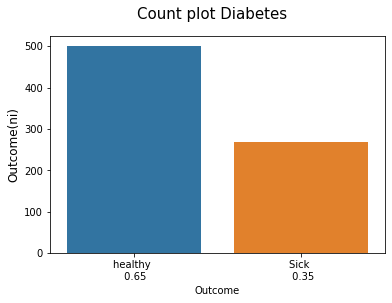

In [10]:
# Data balance
balance_data(data, 'Outcome', 'Sick','healthy', 'Diabetes')

- Hay un desbalance

In [11]:
model = model_base()
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 300, batch_size = 16, verbose = 0)

In [12]:
# Problema de optimización
loss, accuracy = model.evaluate(X_train, y_train)
print('Accuracy: %.3f' % (accuracy))
print('Loss: %.3f' % (loss))

17/17 [==============================] - 0s 1ms/step - loss: 0.4389 - accuracy: 0.8026
Accuracy: 0.803
Loss: 0.439


In [13]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.3f' % (accuracy))
print('Loss: %.3f' % (loss))

8/8 [==============================] - 0s 2ms/step - loss: 0.5423 - accuracy: 0.7489
Accuracy: 0.749
Loss: 0.542


In [14]:
#Keys
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


# Accuracy and Loss

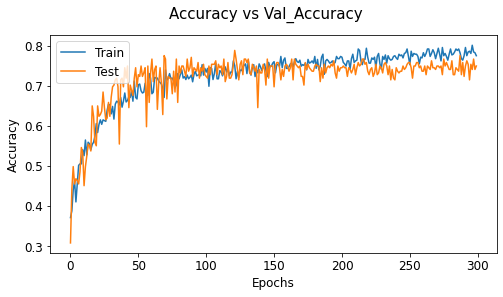

In [15]:
plot_accuracy_loss(history, 'accuracy', 'val_accuracy', 'Accuracy', 'Accuracy vs Val_Accuracy')

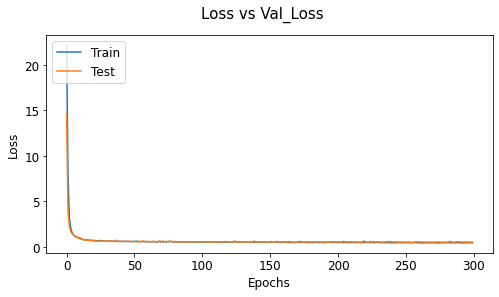

In [16]:
plot_accuracy_loss(history, 'loss', 'val_loss', 'Loss', 'Loss vs Val_Loss')

- La perdida de entrenamiento y validación converge, no se presenta overfitting
- La perdada sigue siendo alta
- Requiero mas datos

# Predictions

In [27]:
y_pred = (model.predict(X_test)>0.5).astype('int32')
y_pred = y_pred.reshape((y_pred.shape[0]))

In [28]:
for i in range(15):
  print('%s --> %d (real %d)' % (X_test[i].tolist(), y_pred[i], y_test[i]))

[8.0, 194.0, 80.0, 0.0, 0.0, 26.1, 0.551, 67.0] --> 1 (real 0)
[1.0, 95.0, 66.0, 13.0, 38.0, 19.6, 0.33399999999999996, 25.0] --> 0 (real 0)
[10.0, 129.0, 62.0, 36.0, 0.0, 41.2, 0.441, 38.0] --> 1 (real 1)
[1.0, 140.0, 74.0, 26.0, 180.0, 24.1, 0.828, 23.0] --> 1 (real 0)
[2.0, 146.0, 0.0, 0.0, 0.0, 27.5, 0.24, 28.0] --> 1 (real 1)
[4.0, 99.0, 72.0, 17.0, 0.0, 25.6, 0.294, 28.0] --> 0 (real 0)
[1.0, 122.0, 64.0, 32.0, 156.0, 35.1, 0.6920000000000001, 30.0] --> 0 (real 1)
[3.0, 141.0, 0.0, 0.0, 0.0, 30.0, 0.7609999999999999, 27.0] --> 1 (real 1)
[3.0, 124.0, 80.0, 33.0, 130.0, 33.2, 0.305, 26.0] --> 0 (real 0)
[0.0, 128.0, 68.0, 19.0, 180.0, 30.5, 1.391, 25.0] --> 0 (real 1)
[1.0, 102.0, 74.0, 0.0, 0.0, 39.5, 0.293, 42.0] --> 0 (real 1)
[10.0, 125.0, 70.0, 26.0, 115.0, 31.1, 0.205, 41.0] --> 1 (real 1)
[9.0, 123.0, 70.0, 44.0, 94.0, 33.1, 0.374, 40.0] --> 0 (real 0)
[7.0, 142.0, 60.0, 33.0, 190.0, 28.8, 0.687, 61.0] --> 1 (real 0)
[2.0, 100.0, 70.0, 52.0, 57.0, 40.5, 0.677, 25.0] --> 0 (

# Confusion Matrix

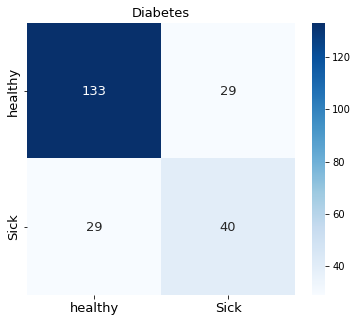

In [29]:
matrix = matrix_confusion(y_test, y_pred, 'Diabetes', 'Sick', 'healthy')

# Metrics

In [30]:
metrics_clasification_binary(y_test, y_pred, 'Diabetes',[1], matrix)

Accuracy 0.7489177489177489
Kappa 0.4006977992485239
----------------------------------------------------------- 

Metrics of Diabetes
Precision 0.5797101449275363
Recall:  0.5797101449275363
Specificity 0.8209876543209876
F1-score      :  0.5797101449275363


- El modelo es deficiente al momento de predecir los enfermos

# Cross Validation

In [32]:
#StratifiedKFold

kfold = StratifiedKFold(n_splits=10, shuffle=True)
cvscores_loss_train = []
cvscores_loss_test = []
cvscores_accuracy_train = []
cvscores_accuracy_test = []

for train, test in kfold.split(X,y):
  model = model_base()
  model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=150, batch_size = 16, verbose = 0)
  loss_train, accuracy_train = model.evaluate(X[train], y[train], verbose=0)
  cvscores_loss_train.append(loss_train)
  cvscores_accuracy_train.append(accuracy_train)
  loss_test, accuracy_test = model.evaluate(X[test], y[test], verbose=0)
  cvscores_loss_test.append(loss_test)
  cvscores_accuracy_test.append(accuracy_test)
  print('======================================================================')
  print('loss: %.3f accuracy: %.3f%% val_loss: %.3f val_accuracy: %.3f%%' % (loss_train, accuracy_train*100, loss_test, accuracy_test*100))

print('==============================Train Accuracy Total 10 pliegues==============================')
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores_accuracy_train), np.std(cvscores_accuracy_train)))
print('==============================Test Accuracy Total 10 pliegues==============================')
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores_accuracy_test), np.std(cvscores_accuracy_test)))
print('==============================Train Loss Total 10 pliegues==============================')
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores_loss_train), np.std(cvscores_loss_train)))
print('==============================Test Loss Total 10 pliegues==============================')
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores_loss_test), np.std(cvscores_loss_test)))

loss: 0.528 accuracy: 73.372% val_loss: 0.520 val_accuracy: 76.623%
loss: 0.607 accuracy: 69.465% val_loss: 0.510 val_accuracy: 76.623%
loss: 0.507 accuracy: 76.845% val_loss: 0.559 val_accuracy: 70.130%
loss: 0.516 accuracy: 76.266% val_loss: 0.534 val_accuracy: 76.623%
loss: 0.504 accuracy: 74.964% val_loss: 0.557 val_accuracy: 79.221%
loss: 0.529 accuracy: 73.372% val_loss: 0.447 val_accuracy: 83.117%
loss: 0.542 accuracy: 74.096% val_loss: 0.525 val_accuracy: 77.922%
loss: 0.503 accuracy: 76.556% val_loss: 0.549 val_accuracy: 70.130%
loss: 0.510 accuracy: 74.566% val_loss: 0.505 val_accuracy: 76.316%
loss: 0.517 accuracy: 75.867% val_loss: 0.501 val_accuracy: 73.684%
==============================Train Accuracy Total 10 pliegues==============================
0.75% (+/- 0.02%)
==============================Test Accuracy Total 10 pliegues==============================
0.76% (+/- 0.04%)
==============================Train Loss Total 10 pliegues==============================
0.53% (+/-

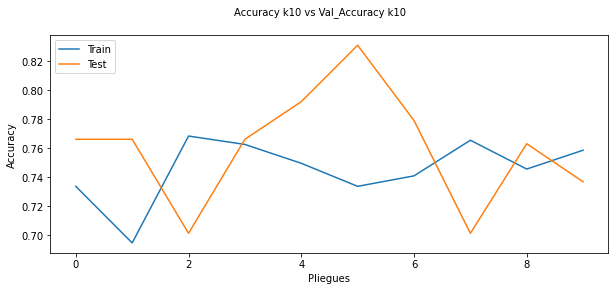

In [33]:
fig, ax = plt.subplots(figsize = (10,4))
fig.suptitle(f'Accuracy k{len(cvscores_accuracy_train)} vs Val_Accuracy k{len(cvscores_accuracy_test)}', fontsize = 10)
ax.plot(cvscores_accuracy_train)
ax.plot(cvscores_accuracy_test)
ax.set_xlabel('Pliegues', size = 10)
ax.set_ylabel('Accuracy', size = 10)
ax.legend(['Train', 'Test'], loc='upper left', fontsize = 10)
ax.tick_params(labelsize = 10)

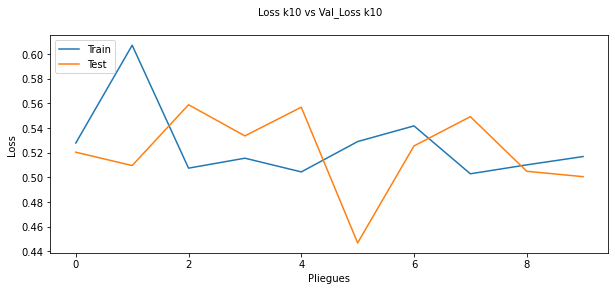

In [34]:
fig, ax = plt.subplots(figsize = (10,4))
fig.suptitle(f'Loss k{len(cvscores_loss_train)} vs Val_Loss k{len(cvscores_loss_test)}', fontsize = 10)
ax.plot(cvscores_loss_train)
ax.plot(cvscores_loss_test)
ax.set_xlabel('Pliegues', size = 10)
ax.set_ylabel('Loss', size = 10)
ax.legend(['Train', 'Test'], loc='upper left', fontsize = 10)
ax.tick_params(labelsize = 10)